In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
# to upload and read data in google colab
import re
import io
from google.colab import files
from google.colab import drive
# for graph
import seaborn as sns
import matplotlib.pyplot as plt
# ML preparation
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
# ML
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Embedding, Dense, Flatten
# avoid overfitting
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
# evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
# for fine tuning
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
uploaded = files.upload()

Saving Preprocessed_data_ID.csv to Preprocessed_data_ID.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Preprocessed_data_ID.csv']))
df.head()

Unnamed: 0  essay_id  essay_set  \
0           0         1          1   
1           1         2          1   
2           2         3          1   
3           3         4          1   
4           4         5          1   

                                          translated  Normalised  \
0  Surat kabar lokal yang terhormat, menurut saya...         0.6   
1  Sayang, saya percaya bahwa menggunakan kompute...         0.7   
2  Sayang, Semakin banyak orang menggunakan kompu...         0.5   
3  Koran Lokal yang terhormat, Saya telah menemuk...         0.8   
4  Sayang, saya tahu memiliki komputer memiliki e...         0.6   

                                         CleanAnswer  \
0  surat kabar lokal yang terhormat menurut saya ...   
1  sayang saya percaya bahwa menggunakan komputer...   
2  sayang semakin banyak orang menggunakan komput...   
3  koran lokal yang terhormat saya telah menemuka...   
4  sayang saya tahu memiliki komputer memiliki ef...   

                                                Stem  \
0  surat kabar lokal yang hormat turut saya efek ...   
1  sayang saya percaya bahwa guna komputer akan u...   
2  sayang makin banyak orang guna komputer tetapi...   
3  koran lokal yang hormat saya telah temu bahwa ...   
4  sayang saya tahu milik komputer milik efek pos...   

                                              Tokens  char_count  word_count  \
0  ['surat', 'kabar', 'lokal', 'hormat', 'efek', ...        2064         303   
1  ['sayang', 'percaya', 'komputer', 'untung', 'b...        2539         363   
2  ['sayang', 'orang', 'komputer', 'orang', 'tuju...        3428         479   
3  ['koran', 'lokal', 'hormat', 'temu', 'ahli', '...        3243         448   
4  ['sayang', 'milik', 'komputer', 'milik', 'efek...        2766         389   

   avg_word_len  spell_err_count  
0      6.811881               17  
1      6.994490               16  
2      7.156576                8  
3      7.238839               31  
4      7.110540               16

In [ ]:
df.describe()

Unnamed: 0      essay_id     essay_set    Normalised    char_count  \
count  12949.000000  12949.000000  12949.000000  12949.000000  12949.000000   
mean    6485.924241  10291.599120      4.178083      0.589323   1366.834196   
std     3744.339811   6305.312087      2.135605      0.240037   1314.978740   
min        0.000000      1.000000      1.000000      0.000000     27.000000   
25%     3245.000000   4440.000000      2.000000      0.400000    515.000000   
50%     6487.000000  10044.000000      4.000000      0.600000    839.000000   
75%     9727.000000  15676.000000      6.000000      0.750000   1921.000000   
max    12976.000000  21633.000000      8.000000      1.000000   9857.000000   

         word_count  avg_word_len  spell_err_count  
count  12949.000000  12949.000000     12949.000000  
mean     200.540660      6.843438        11.266198  
std      194.048842      0.338905        11.117097  
min        5.000000      5.000000         0.000000  
25%       75.000000      6.632353         4.000000  
50%      122.000000      6.839416         8.000000  
75%      282.000000      7.050505        15.000000  
max     1542.000000      9.500000       163.000000

In [ ]:
x = df['Stem']
y = df['Normalised']

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

9711 9711
3238 3238


In [ ]:
text = df['Stem']
label = df['Normalised']

# Calculating the total vocabulary
tk = Tokenizer()
tk.fit_on_texts(text)

vocab = len(tk.word_index)+1
vocab

12883

In [ ]:
# Maximum length
max_len = np.max(df['Stem'].apply(lambda x: len(x.split())).values)
max_len

1542

In [ ]:
def embedding(text):
    return tk.texts_to_sequences(text)

train_padded = pad_sequences(embedding(text), 1542, padding='post')
train_padded

array([[  342,   488,   547, ...,     0,     0,     0],
       [  499,     3,   144, ...,     0,     0,     0],
       [  499,   317,    26, ...,     0,     0,     0],
       ...,
       [   47,     7,    90, ...,     0,     0,     0],
       [12878,     4,  1528, ...,     0,     0,     0],
       [   26,     8,   144, ...,     0,     0,     0]], dtype=int32)

In [ ]:
uploadg = files.upload()

Saving glove_id.txt to glove_id.txt


In [ ]:
embedding_dict = dict()
embedding_dim = 50

# Each word is represented in one line in the text file
with open('glove_id.txt', 'r') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector = np.asarray(records[1:], dtype='float32')
        embedding_dict[word] = vector

In [ ]:
# Creating a matrix for each word as index (word numerical value extracted from tokenizer
# with N-features (corresponding to GloVe)
# We will replace the matrix elements by the words and their embeddings

# Our embeddings will also consist embeddings for padding
embedding_matrix = np.zeros((vocab, embedding_dim))

for word, index in tk.word_index.items():
    embed_vector = embedding_dict.get(word)
    if embed_vector is not None:
        embedding_matrix[index] = embed_vector

embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.94551009e-01, -9.95750010e-01,  7.57867992e-01, ...,
         1.51862705e+00,  2.50085306e+00,  5.41719019e-01],
       [ 4.31110002e-02, -4.15558994e-01,  9.01297987e-01, ...,
         1.46225500e+00,  2.83015990e+00,  1.90399995e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.25801980e-01,  2.63925999e-01, -5.19765019e-01, ...,
         1.23261297e+00, -6.78735971e-01,  4.57060993e-01],
       [ 9.92554009e-01,  1.57340001e-02,  5.40418029e-01, ...,
         1.12499106e+00, -2.97879994e-01,  4.60025996e-01]])

In [ ]:
# NN and GloVe embedding
train_padded.shape

(12949, 1542)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_padded, label, test_size=0.2)

In [ ]:
# Plotting the results
def learning_curve(history, arr):
    fig, ax=plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]])
        ax[idx].set_xlabel('Epochs')
        ax[idx].set_ylabel('Value')
        ax[idx].set_title(arr[idx][0]+' X '+ arr[idx][1])

In [ ]:
def create_model(learning_rate = 0.01, activation = 'relu'):
    opt = Adam(lr=learning_rate)
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                   output_dim=embedding_matrix.shape[1],
                   weights=[embedding_matrix],
                   input_length=max_len))
    model.add(Dense(125, activation=activation))
    model.add(Dense(60, activation=activation))
    model.add(Dense(30, activation=activation))
    model.add(Dense(15, activation=activation))
    model.add(Flatten(input_shape=(max_len, 1)))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
    return model

# Fine tuning
# Create a KerasRegressor
model = KerasRegressor(build_fn = create_model,
                       verbose = 0)
# Define the parameters to try out
params = {'activation':['relu', 'tanh']}
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(5))
random_search_results = random_search.fit(x_train, y_train)

<ipython-input-15-d38e7680f5a1>:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

Best Score:  -0.032230930775403975 and Best Params:  {'activation': 'relu'}


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                   output_dim=embedding_matrix.shape[1],
                   weights=[embedding_matrix],
                   input_length=max_len))
model.add(Dense(125, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Flatten(input_shape=(max_len, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 1542, 50)          644150    
                                                                 
 dense_55 (Dense)            (None, 1542, 125)         6375      
                                                                 
 dense_56 (Dense)            (None, 1542, 60)          7560      
                                                                 
 dense_57 (Dense)            (None, 1542, 30)          1830      
                                                                 
 dense_58 (Dense)            (None, 1542, 15)          465       
                                                                 
 flatten_11 (Flatten)        (None, 23130)             0         
                                                                 
 dense_59 (Dense)            (None, 1)               

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', vactor=0.1, verbose=1, patience=5, min_lr=0.0001)
stopearly = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)

history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test), verbose=1, callbacks=[reduce_lr, stopearly])

model.save('regr_model.h5')

Epoch 1/100
208/208 [==============================] - 82s 383ms/step - loss: 0.0406 - mae: 0.1529 - val_loss: 0.0405 - val_mae: 0.1588 - lr: 0.0010
Epoch 2/100
208/208 [==============================] - 81s 388ms/step - loss: 0.0291 - mae: 0.1305 - val_loss: 0.0332 - val_mae: 0.1415 - lr: 0.0010
Epoch 3/100
208/208 [==============================] - 82s 393ms/step - loss: 0.0260 - mae: 0.1216 - val_loss: 0.0316 - val_mae: 0.1371 - lr: 0.0010
Epoch 4/100
208/208 [==============================] - 80s 386ms/step - loss: 0.0240 - mae: 0.1166 - val_loss: 0.0322 - val_mae: 0.1388 - lr: 0.0010
Epoch 5/100
208/208 [==============================] - 81s 389ms/step - loss: 0.0224 - mae: 0.1116 - val_loss: 0.0324 - val_mae: 0.1396 - lr: 0.0010
Epoch 6/100
208/208 [==============================] - 82s 394ms/step - loss: 0.0214 - mae: 0.1084 - val_loss: 0.0342 - val_mae: 0.1435 - lr: 0.0010
Epoch 7/100
208/208 [==============================] - 81s 387ms/step - loss: 0.0193 - mae: 0.1020 - val_l

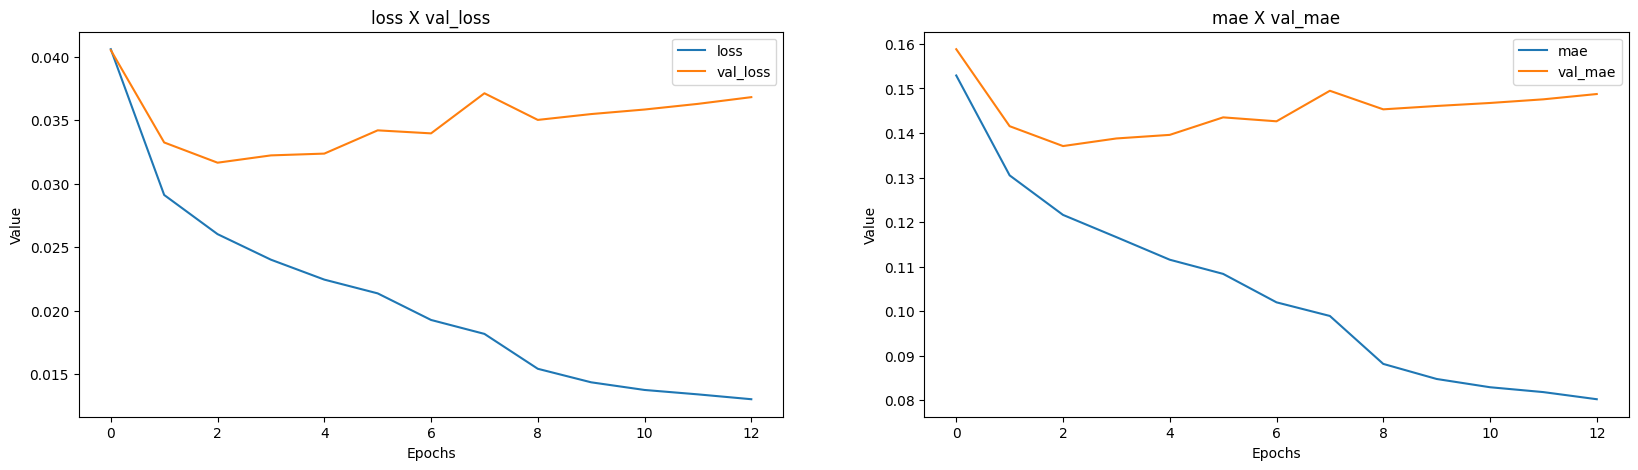

In [ ]:
learning_curve(history, [['loss', 'val_loss'], ['mae', 'val_mae']])

In [ ]:
yp = model.predict(x_test)
yp

81/81 [==============================] - 5s 53ms/step


array([[0.432754  ],
       [0.29898223],
       [0.57644933],
       ...,
       [0.79341567],
       [0.9713344 ],
       [0.3799213 ]], dtype=float32)